In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']
data = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<Axes: >

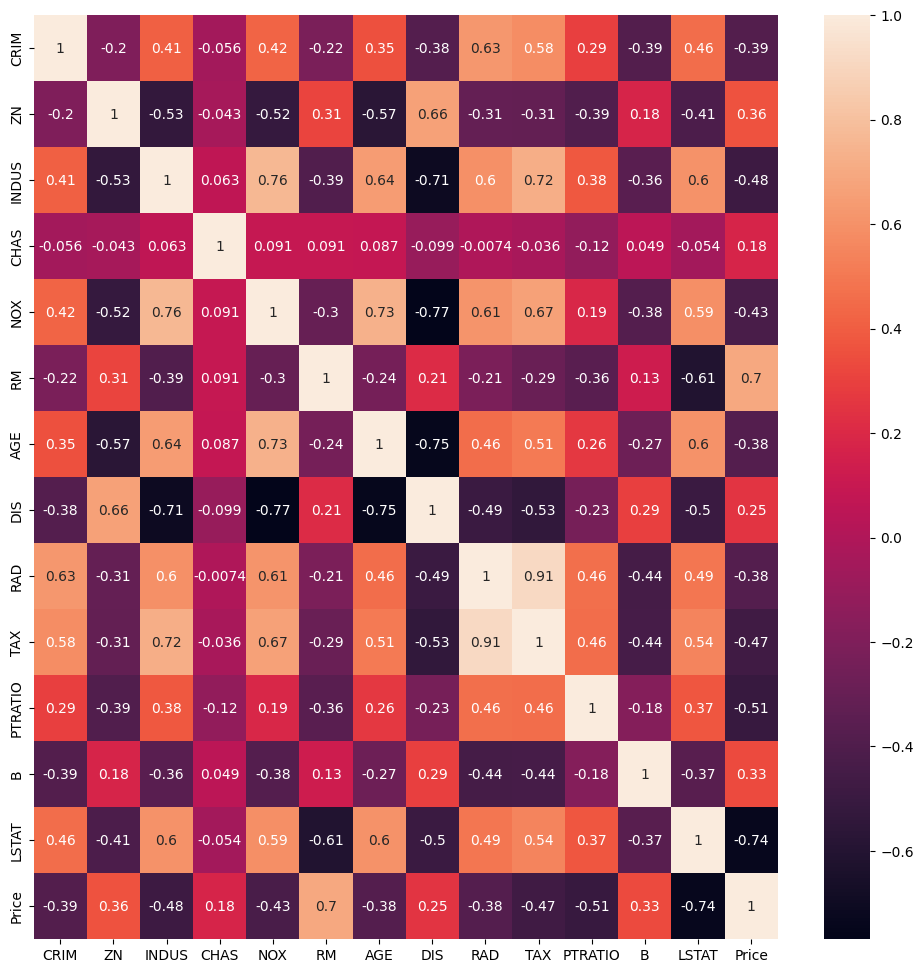

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)

In [25]:
data.drop(["INDUS", "NOX"], inplace=True, axis=1)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
features = data.columns[0:-1]
target = data.columns[-1]

x = data[features].values
y = data[target].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print(f"LR Train Score: {train_score_lr}\nLR Test Score: {test_score_lr}")
print()

ridgeReg = Ridge(alpha=10)
ridgeReg.fit(X_train, y_train)

train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print(f"Ridge Train Score: {train_score_ridge}\nRidge Test Score: {test_score_ridge}")
print()

lassoReg = Lasso(alpha=10)
lassoReg.fit(X_train, y_train)

train_score_lasso = lassoReg.score(X_train, y_train)
test_score_lasso = lassoReg.score(X_test, y_test)

print(f"Lasso Train Score: {train_score_lasso}\nLasso Test Score: {test_score_lasso}")

LR Train Score: 0.7196127381328039
LR Test Score: 0.7439797409912347

Ridge Train Score: 0.7184896206434612
Ridge Test Score: 0.7424014826106689

Lasso Train Score: 0.0
Lasso Test Score: -0.0030704836212473996


#### now using cv

In [43]:
from sklearn.linear_model import RidgeCV, LassoCV

In [60]:
ridge_cv = RidgeCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]).fit(X_train, y_train)
train_score_ridge_cv = ridge_cv.score(X_train, y_train)
test_score_ridge_cv = ridge_cv.score(X_test, y_test)

print(f"RidgeCV Train Score: {train_score_ridge_cv}\nRidgeCV Test Score: {train_score_ridge_cv}")
print()

lasso_cv = LassoCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)
train_score_lasso_cv = lasso_cv.score(X_train, y_train)
test_score_lasso_cv = lasso_cv.score(X_test, y_test)

print(f"LassoCV Train Score: {train_score_lasso_cv}\nRidge Test Score: {test_score_lasso_cv}")

RidgeCV Train Score: 0.7184896206434619
RidgeCV Test Score: 0.7184896206434619

LassoCV Train Score: 0.7196127333721679
Ridge Test Score: 0.7439778360829133
